In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [176]:
df = pd.read_csv("HousePricePrediction.csv")
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [177]:
df.tail()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN
2918,2918,60,RL,9627,Inside,1Fam,5,1993,1994,HdBoard,0.0,996.0,NaN


In [178]:
df.shape

(2919, 13)

In [179]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [181]:
df.duplicated().sum()

0

In [182]:
df = df.drop(['Id'], axis =1)

In [183]:
df.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


## Data Visualization

<Axes: >

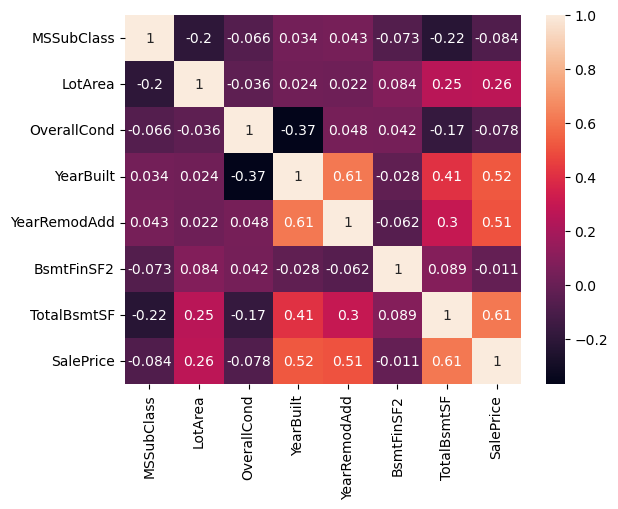

In [184]:
num = df.select_dtypes(include = 'number')
correlation = num.corr()
sns.heatmap( correlation, xticklabels = num.columns, yticklabels = num.columns, annot = True)

The heapmap indicates that LotArea, TotalBsmtSF, YearBuil and YearRemodAdd contribute more than others to the target column

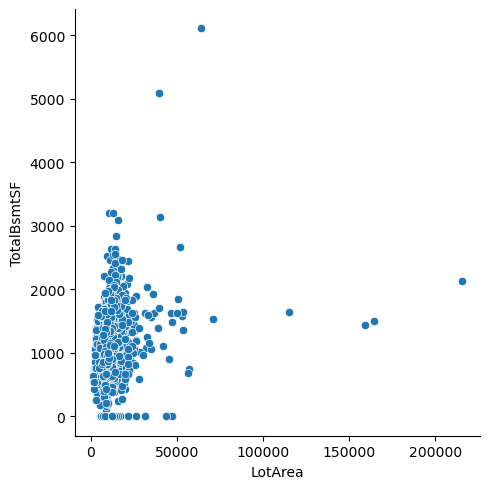

In [185]:
sns.relplot( x = 'LotArea', y = 'TotalBsmtSF', data = df)

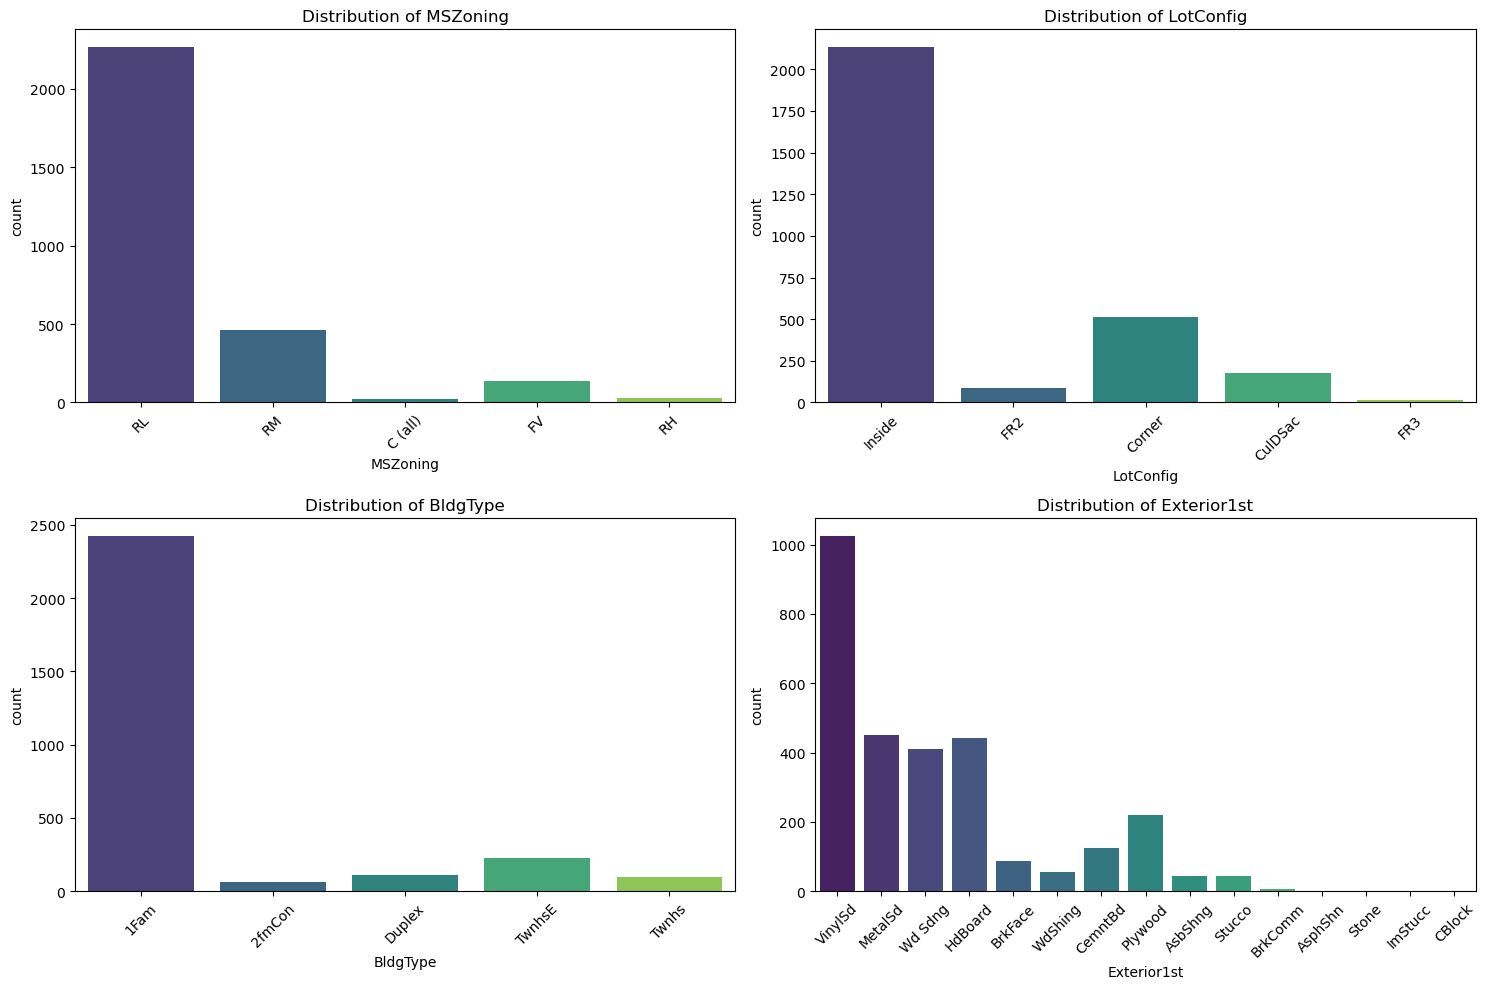

In [186]:
cat_ = ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

plt.figure(figsize=(15, 10))
for i, column in enumerate(cat_, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Cleaning

In [187]:
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [188]:
df['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [189]:
df['TotalBsmtSF'].value_counts()

TotalBsmtSF
0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
1571.0     1
2633.0     1
757.0      1
873.0      1
1381.0     1
Name: count, Length: 1058, dtype: int64

In [190]:
df['BsmtFinSF2'].value_counts()

BsmtFinSF2
0.0       2571
180.0        5
294.0        5
435.0        3
483.0        3
          ... 
600.0        1
211.0        1
1031.0       1
438.0        1
297.0        1
Name: count, Length: 272, dtype: int64

In [191]:
df['Exterior1st'].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

Imputing the missing values for the target column could potentially add bias to the data as we will replace them with the same value and see the percentage of them as about 50%. Therefore, the missing values for SalePrice will be dropped.


In [192]:
df = df.dropna(subset = ['SalePrice'])

The missing values for Exterior1st, BsmtFinSF2, and TotalBsmtSF will also be dropped.

In [193]:
df = df.dropna(subset = ['Exterior1st', 'BsmtFinSF2', 'TotalBsmtSF', 'MSZoning'])

In [194]:
df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [195]:
df.shape

(1460, 12)

In [196]:
df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,5.575342,1971.267808,1984.865753,46.549315,1057.429452,180921.195890
std,42.300571,9981.264932,1.112799,30.202904,20.645407,161.319273,438.705324,79442.502883
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,795.750000,129975.000000
50%,50.000000,9478.500000,5.000000,1973.000000,1994.000000,0.000000,991.500000,163000.000000
75%,70.000000,11601.500000,6.000000,2000.000000,2004.000000,0.000000,1298.250000,214000.000000
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1474.000000,6110.000000,755000.000000


## Outlier Detection

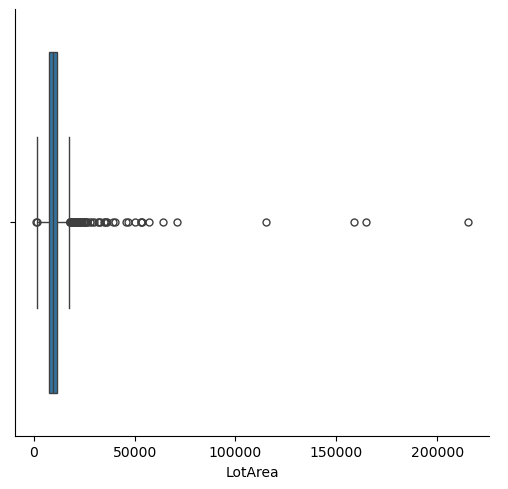

In [197]:
sns.catplot(x = 'LotArea', kind = 'box', data =df)

It is clear from the box plot of 'LotArea' that there are many outliers

In [198]:
Q1 = np.percentile(df['LotArea'], 25, method='midpoint')
Q3 = np.percentile(df['LotArea'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

4054.0


In [199]:
# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(df['LotArea'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(df['LotArea'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 17684.0
67
Lower Bound: 1468.0
1


In [200]:
df = df[(df.LotArea < upper) & (df.LotArea > lower)]

In [201]:
df.shape

(1392, 12)

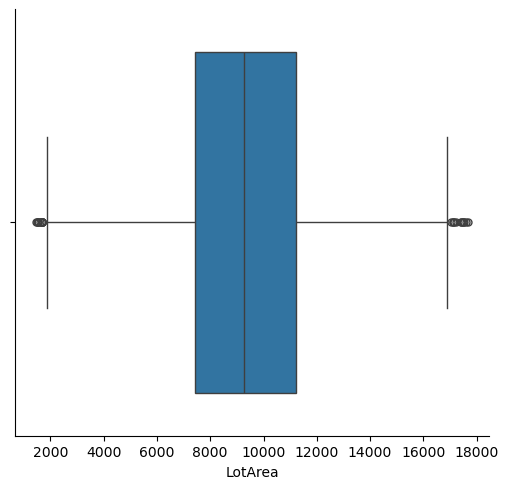

In [202]:
sns.catplot(x = 'LotArea', kind = 'box', data =df)

## Convesion of categorial to numerical

In [203]:
cat_col = df.select_dtypes('object').columns.tolist()
print(cat_col)

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']


In [204]:
dummies = pd.get_dummies(df[cat_col], dtype = int)


df = pd.concat([df, dummies], axis = 'columns')

df.drop(cat_col, axis = 'columns', inplace = True)



In [205]:
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,5,1999,2000,0.0,953.0,175000.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1456,20,13175,6,1978,1988,163.0,1542.0,210000.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1457,70,9042,9,1941,2006,0.0,1152.0,266500.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1458,20,9717,6,1950,1996,1029.0,1078.0,142125.0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Data Scaling 

In [206]:
columns_to_scale = ['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt',
                   'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']
scaler = MinMaxScaler()
scaler.fit(df[columns_to_scale])
df[columns_to_scale] = scaler.transform(df[columns_to_scale])

In [207]:
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.235294,0.430592,0.500,0.949275,0.883333,0.000000,0.266999,0.244473,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.000000,0.501606,0.875,0.753623,0.433333,0.000000,0.393637,0.206450,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.235294,0.603495,0.500,0.934783,0.866667,0.000000,0.286962,0.265596,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.294118,0.498518,0.500,0.311594,0.333333,0.000000,0.235808,0.148007,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.235294,0.789366,0.500,0.927536,0.833333,0.000000,0.357143,0.302915,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.397678,0.500,0.920290,0.833333,0.000000,0.297255,0.197296,0,0,...,0,0,0,0,0,0,0,1,0,0
1456,0.000000,0.722366,0.625,0.768116,0.633333,0.110583,0.480973,0.246585,0,0,...,0,0,0,0,1,0,0,0,0,0
1457,0.294118,0.467148,1.000,0.500000,0.933333,0.000000,0.359326,0.326151,0,0,...,1,0,0,0,0,0,0,0,0,0
1458,0.000000,0.508830,0.625,0.565217,0.766667,0.698100,0.336245,0.151000,0,0,...,0,0,0,1,0,0,0,0,0,0


# Data Splitting 

In [208]:
X = df.drop(columns = 'SalePrice')
y = df['SalePrice']

print(X.shape)
print(y.shape)

(1392, 37)
(1392,)


In [209]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42)

In [210]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1113, 37)
(279, 37)
(1113,)
(279,)


In [211]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [212]:
# Evaluate the model
mean_absolute_error(y_test, y_pred)

0.043369579976189176

## Conclusion
Linear regression gives better accuracy as the mean absolute error is very low  at 0.04.